# California Housing (1990s)


This is a typical dataset used by many books and online courses to demonstrate Machine Learning algorithms. The set contains Housing prices in California from the 1990s, which makes it kinda dated if you're looking to get actual predictions out of it, but that doesn't mean we can't use it to train models and compare them effectively! 

Without furthur adue, let me start by listing the steps (pipeline) I'm going to follow in this project. It is taken from Aurélien Géron's "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" Appendix B.


> "There are eight main steps:
> 1. Frame the problem and look at the big picture.
> 2. Get the data.
> 3. Explore the data to gain insights.
> 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
> 5. Explore many different models and shortlist the best ones.
> 6. Fine-tune your models and combine them into a great solution.
> 7. Present your solution.
> 8. Launch, monitor, and maintain your system.
> Obviously, you should feel free to adapt this checklist to your needs."

Aurélien breaks down each point into smaller steps in Appendix.B of his book. Which is exactly what I'm goign to copy and follow. This is going to be the project's check-list that I'm going to ticking step by step as we go!   
But before we start let's import the libraries we're going to use:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lib

%matplotlib inline

## 1. Frame the Problem and Look at the Big Picture:

To effectively frame the problem, you need to know the end goal of the project. Where does your model fit in the workflow, and which system/s it will get the data from, and feed results to. More often than not, models' outputs are used as inputs of another apps, which will make the investment decision.  
It's very important to understand how the benifits to the company.  

In our case, let's assume the problem is to predict `median_house_value` by district as a continuous varialbe and feed it to a downstream system that'll use it -along with other inputs- to form an investement decision. And let's also assume a legacy system does this today using a complicated hard-coded rules. The challange now is to outperform the legacy system in terms of accuracy, speed, generalization or any other goal that justifies this project. Make sure to have measuralbe goals

||Supervised | Unsupervised | Reinforcement|
|--|--|--|--|
|**Calssification**|-|-|-
|**Regression**|x|-|-|-
|**Batch**|x|-|-|-
|**Online**|-|-|-



This is clearly a supervised problem as we are given $y$ values in the set, and it's a regression because we're predicting it.  
We don't have a continuous flow of data coming into the system to qualify as online training, therefor this is a batch driven process. That said, you can artifically convert this to an online training if the data is huge, and you want to smooth the learning process.

### 1.2 Performance Measure:
Because the problem is a regression and the output is continuous postitive variable, it's common to use RMSE (Root Mean Square Erro) as a performance measure. It's basically the square-root of MSE, which is known to make the error term more inline with the magnitude of the target.
$$MSE = \frac{1}{n} \sqrt{\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}$$  
$$RMSE = \sqrt{MSE}$$
The downside of MSE & RMSE is that they penalize large errors, and they hard to interperate in the of the target in case you want to communicate the error term. To solve that, you should use MAE if your dataset contains a lot of outliers and/or you'd like to communicate the error term in an explanable unit (USD for example)
$$MAE = \frac{1}{n} \sum\limits_{i=1}^n|(y_i - \hat{y_i})|$$

I've written three function in `lib\utils.py` to calculate each of these performance measures. 

*Note: performance measures are also used as cost functions in many algorithms. Check this notebook for examples*
https://github.com/ayjabri/Regression/blob/main/Linear/Simple/MinCostFunc.ipynb

## 2. Get the Data

Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the
data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

I'm going to skip steps 1-6 givin the source and size of the data being studies, and jump to steps 7 & 8 on getting the data!
I've written a small function in `lib\utils.py` to retrive the zipped file from Aeron's github repo, and extract it into Pandas DataFrame. It's very impoortant to automate these step, because in real projects the data is almost always scattered across systems and never ready to use.

In [2]:
## Uncomment and run this cell only if you want to fetch the file from the internet
## Otherwise, there shhould be a `.parquet` copy of it on my Github

# URL = 'https://github.com/ageron/handson-ml2/raw/master/datasets/housing'
# filename = 'housing.tgz'
# data = lib.fetch_online_zip_file(URL, filename, as_frame=True, overwrite=False)
# data.head()

In [3]:
# Parquet files have much smaller size than csv
filename = 'housing.parquet'
data = pd.read_parquet(filename)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float32 
 1   latitude            20640 non-null  float32 
 2   housing_median_age  20640 non-null  float32 
 3   total_rooms         20640 non-null  float32 
 4   total_bedrooms      20433 non-null  float32 
 5   population          20640 non-null  float32 
 6   households          20640 non-null  float32 
 7   median_income       20640 non-null  float32 
 8   median_house_value  20640 non-null  float32 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float32(9)
memory usage: 746.1 KB


I see null values in `total_bedrooms` that must be addressed

In [5]:
data.value_counts('ocean_proximity')

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [6]:
# file = filename.split('.')[0] + '.csv'
size = os.path.getsize(filename) / (1024 * 1024)
print(f'''{filename.split('.')[0].capitalize()} file size on disk is: {size:.2f} MB
The total number of records is {len(data):,} rows''')

Housing file size on disk is: 0.37 MB
The total number of records is 20,640 rows


The size of the data is relatively small, so we have no storage issues to worry about. Let's move on to the last step: sample the data. 

### 2.11 Sample the Data (split):

Data split must be done before plotting the data to avoid data snooping bias. The typical test size is 20%.

**There are two main ways to do it:**

1. Using sklearn's `train_test_split`. Set `random` key to some constant to ensure re-producability, and set `stratify` to a category column for unbiased sampling.
2. Using hashing like `crc32` which returns an integer that ranges between $[0, 2^{32}]$. The way to use it is to calculate `crc32` for each row in a column, usually the index, then sort and select the top, or bottom, 20% (test size) of the result as your train index. 

This is a very critical step that is often overlooked. The standard techniques, such as scikit-learn's `train_test_split` although good for a one time training, but not suitable for live models (ones that train on new data all the time).

If your model is live, it will get new data periodically to train on, to keep it up-to-date. The new data can be either be appended to the old one, or replace part of it.   
The challange becomes on how to re-split the appended set without changing the previous split. i.e. if a record was previously in the test set, we want it to remain there when we split again.

The problem with the traditional split techniques that they expose the model to both training and testing sets over time, because of the randomness involved in splitting. 

We need something that retins the old splitting when performing a new one for the appended data. To accomplish this, you can either save a hard copy of each set, then split and append the new sets to each one on file. Using a unique identifier, or a hashing technique ensures each record will be in the same set no matter how many times we split.

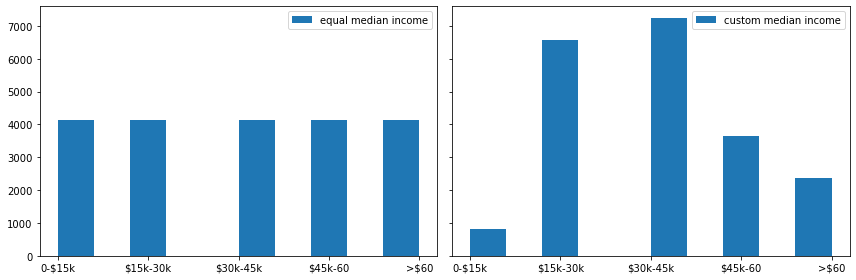

In [7]:
# Stratified sampling ensures the split retinas the distribution across a selected category
# Add a meaningfull categories from median_income. This is common in real-life 
# where people are categorized based on their income into groupe ($0-15k, $15K -30K..etc)

inf = float('inf')
labels = [1,2,3,4,5]

# Custom function that discretize a variable into equal-sized buckets
# Similarly you can use `qcut` from pandas, which yeilds same results
# df_eq = lib.gen_equal_length_cat_col(df, 'median_income', 5)
med_income_cat_eq = pd.qcut(data.median_income, q=5, labels=labels)

# Alternatively we can discritize median income into custom buckets that makes economic sense
bins = [0.,1.5,3.,4.5,6.,inf] #1.5 represents an income of $15k/year

med_income_cat_custom = pd.cut(data['median_income'], bins=bins, labels=labels)

##Plot the two different discritization methods
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,4))
ax1.hist(med_income_cat_eq, label='equal median income')
ax2.hist(med_income_cat_custom, label='custom median income')
ax1.set_xticks([1,2,3,4,5])
ax1.set_xticklabels(['0-$15k','$15k-30k','$30k-45k','$45k-60','>$60'])
ax2.set_xticks([1,2,3,4,5])
ax2.set_xticklabels(['0-$15k','$15k-30k','$30k-45k','$45k-60','>$60'])
ax1.legend()
ax2.legend()
plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split
#
SEED=42

train_idx, test_idx = train_test_split(data.index, random_state=SEED, stratify=med_income_cat_custom)
df = data.iloc[train_idx].reset_index(drop=True)
test_set = data.iloc[test_idx].reset_index(drop=True)

# Save test data on disk and never look at it until settle on a model
test_set.to_parquet('housing_test.parquet')
df.to_parquet('housing_train.parquet')

In [13]:
len(df), len(test_set)

(15480, 5160)

In [18]:
# check the value count of median income categories in training set
(med_income_cat_custom.iloc[train_idx].value_counts()/len(train_idx)).sort_index()

1    0.039793
2    0.318863
3    0.350581
4    0.176292
5    0.114470
Name: median_income, dtype: float64

In [19]:
# check the value count of median income categories in test set
(med_income_cat_custom.iloc[test_idx].value_counts()/len(test_idx)).sort_index()

1    0.039922
2    0.318798
3    0.350581
4    0.176357
5    0.114341
Name: median_income, dtype: float64

## 3. Explore the Data 
After taking a quick look on the data structure I'm going split the data into training and testing sets

Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:  
    • Name  
    • Type (categorical, int/float, bounded/unbounded, text, structured, etc.)  
    • % of missing values  
    • Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)  
    • Usefulness for the task  
    • Type of distribution (Gaussian, uniform, logarithmic, etc.)  
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful.
10. Document what you have learned.

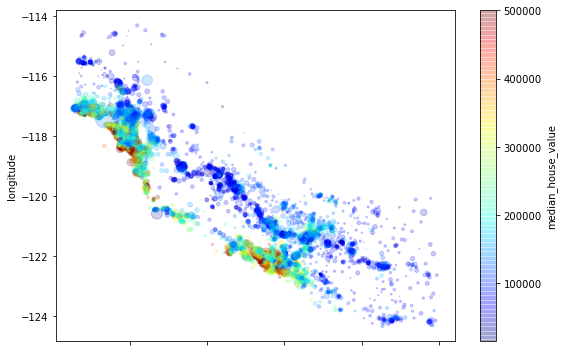

In [25]:
df.plot(x='latitude',y='longitude',
        kind='scatter', alpha=0.2,
        c='median_house_value', cmap='jet',
        s=df.population/100,
       figsize=(8,5));
plt.tight_layout()

## 4. Prepare the data:
Try to expose underlying data patterns to Machine Learnring algorithms

- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply, for five reasons:  
    1. So you can easily prepare the data the next time you get a fresh dataset  
    2. So you can apply these transformations in future projects  
    3. To clean and prepare the test set  
    4. To clean and prepare new data instances once your solution is live  
    5. To make it easy to treat your preparation choices as hyperparameters  
1. Data cleaning:
    1. Fix or remove outliers (optional).
    2. Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).
2. Feature selection (optional):
    1. Drop the attributes that provide no useful information for the task.
3. Feature engineering, where appropriate:
    1. Discretize continuous features.
    2. Decompose features (e.g., categorical, date/time, etc.).
    3. Add promising transformations of features (e.g., log(x), sqrt(x), x 2 , etc.).
    4. Aggregate features into promising new features.
4. Feature scaling:
    1. Standardize or normalize features.
    2. Decompose features (e.g., categorical, date/time, etc.).
    3. Add promising transformations of features (e.g., log(x), sqrt(x), x 2 , etc.).
    4. Aggregate features into promising new features.
4. Feature scaling:
    1. Standardize or normalize features.

## 5. Explore Different Models:
In this step you should explore different models and parameters and pick the one with best metrics defined in step 1.2


- If the data is huge, you may want to sample smaller training sets so you can train
many different models in a reasonable time (be aware that this penalizes complex
models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.
1. Train many quick-and-dirty models from different categories (e.g., linear, naive
    1. Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
    1. For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.
    1. What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that make different types of errors.

## 6. Fine-tune the model:

- You will want to use as much data as possible for this step, especially as you move
toward the end of fine-tuning.

- As always, automate what you can.
1. Fine-tune the hyperparameters using cross-validation:
    1. Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
    2. Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.). 1
2. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

Don’t tweak your model after measuring the generalization error: you would just start overfitting the test set.

## 7. Present Solution

1. Document what you have done.
2. Create a nice presentation.
    1. Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don’t forget to present interesting points you noticed along the way.
    1. Describe what worked and what did not.
    2. List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

## 8. Launch 
This the final stage at which your model sould be ready, and you're about to roll it out into production environment and set the procedures to maintain and monitor it

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.
    1. Beware of slow degradation: models tend to “rot” as data evolves.
    2. Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
    3. Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
3. Retrain your models on a regular basis on fresh data (automate as much as possible).

This is a key step in any analysis that protects participants from drifting away from the main objective. Many data-scientist fall into this trap when they become more focused on the problem instead of a solution. I know that finding a better way to code functions, trying different algorithms and scaling techniques is fun! But it's an endless rabbit hole. So don't get lost in it, especially if someone is paying you to find a solution for their problem and you have limited time to do that!

# Appendix:

Summary of the steps
### 1.1 Define the Objective in business Terms

1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objec‐ tive?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.
